# Data Preprocessing Tools

## Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [8]:
dataset = pd.read_csv('./Data.csv')
# Spliting dataset into matrix of featurs and independent variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

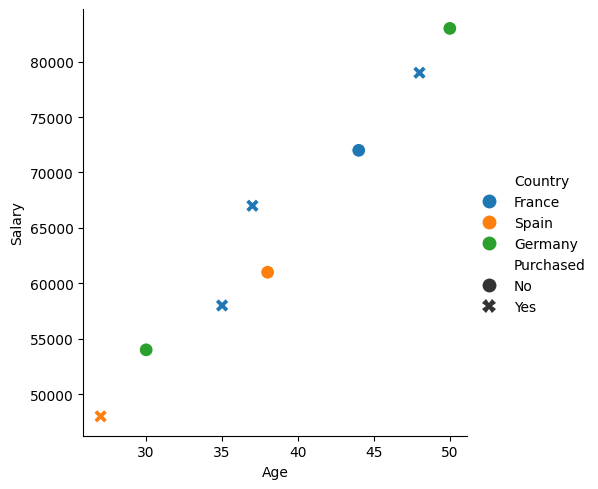

In [9]:
sns.relplot(data=dataset, x='Age', y='Salary', hue='Country', style='Purchased', s=100)

In [10]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [11]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [13]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encoding categorical data

### Encoding the independent variable

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encoding the dependent variable

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting dataset into Training and Test set

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [18]:
x_train, y_test

(array([[1.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object),
 array([0, 1]))

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [29]:
print(x_train)

[[1.0 0.0 0.0 -0.7529426005471074 -0.6260377781240922]
 [1.0 0.0 0.0 1.008453807952985 1.013042950055349]
 [1.0 0.0 0.0 1.7912966561752484 1.8325833141450698]
 [0.0 1.0 0.0 -1.7314961608249366 -1.0943465576039326]
 [1.0 0.0 0.0 -0.3615211764359758 0.4276569757055486]
 [0.0 1.0 0.0 0.22561095973072173 0.05040823668012205]
 [0.0 0.0 1.0 -0.16581046438040992 -0.274806193514212]
 [0.0 0.0 1.0 -0.013591021670525248 -1.328500947343853]]
